In [1]:
#########################
##                     ##
## Irving Gomez Mendez ##
##     May 06, 2021    ##
##                     ##
#########################

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import MDS

In [3]:
def levenshtein(str1, str2):
  d = dict()
  for i in range(len(str1)+1):
     d[i] = dict()
     d[i][0] = i
  for i in range(len(str2)+1):
     d[0][i] = i
  for i in range(1, len(str1)+1):
     for j in range(1, len(str2)+1):
        d[i][j] = min(d[i][j-1]+1, d[i-1][j]+1, d[i-1][j-1]+(not str1[i-1] == str2[j-1]))
  return d[len(str1)][len(str2)]

def disimilar_levenshtein(str1, str2):
    return(levenshtein(str2, str1)/(len(str1) + len(str2)))

disimilar_vect = np.vectorize(disimilar_levenshtein)

In [4]:
# Data taken from Batagelj, V., Kerzic, D., & Pisanski, T. (1992) Automatic Clustering of Languages.
# The data correspond to 16 words in 65 languages
# I added the linguistic family for each language
dat = pd.read_csv('words_languages.csv')
dat

,Language,Family,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16
0,Albanian,Albanian,gjithcka,keq,bark,galm,asht,dite,vdes,pi,vesh,ha,ve,sy,ate,peshk,pese,kembe
1,Arabic Tunisian,Semitic,ilkul,xiab,kirsh,akhal,adhum,yuum,met,ushrub,wdhin,akul,adhum,ain,baba,semica,xamsa,sak
2,Bahasa Malaysia,Malayo-Polynesian,semua,jahat,perut,hitam,tulang,hari,mati,minum,telinga,makan,telur,mata,ayah,ikan,lima,kaki
3,Bengali,Indic,sob,kharap,pet,kalo,harh,din,mora,khaoa,kan,khaoa,dim,chokh,baba,mach,panch,pa
4,Berber,Berber,akith,diri,aaboudh,averkan,ighass,as,amath,sew,amazough,atch,thamalalt,thit,vava,ahithiw,khamsa,akajar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Tamil,Dravidian,ellaam,keduthy,vayiru,karuppu,elumbu,naal,irappu,kuditthal,kaathu,saapiduthal,muttai,kann,appaa,meen,ainthu,kaal
61,Telugu,Dravidian,antha,chedda,kadupu,nalla,yamuka,thinam,chavu,thagu,chevi,thinadam,kuddu,kallu,nanna,chapa,ayithu,kalu
62,Turkish,Turkic,butun,fena,karin,kara,kemik,gun,olmek,icmek,kulak,yemek,yumurta,goz,baba,balik,bes,ayak
63,Ukranian,Slavic,vse,pohane,zhevit,chorne,kistka,den',vmerte,pihte,ukho,yiste,jajtse,oko,bat'ko,rihba,pyat,noha


In [5]:
dat[dat['Language']=='Spanish']

,Language,Family,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16
57,Spanish,Romance,todo,mal,vientre,negro,hueso,dia,morir,beber,oreja,comer,huevo,ojo,padre,pez,cinco,pie


In [6]:
dat[['Language', 'Family']].groupby('Family').agg('count')

,Language
Family,
Albanian,1
Baltic,2
Bantu,1
Berber,1
Celtic,2
Dravidian,4
Esperanto,1
Germanic,9
Hellenic,2


In [7]:
# Let's make logistic regression using germanic and romance languages
# Let's use eseranto words as the basis for the levenshtein distance
dat_simpl = dat[dat['Family'].isin(['Germanic','Romance','Esperanto'])]

dat_simpl

,Language,Family,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16
7,Catalan,Romance,tot,dolent,panxa,negre,os,dia,morir,beure,orella,menjar,ou,ull,pare,peix,cinc,peu
14,Danish,Germanic,all,slet,bug,sort,ben,dag,at doe,at drikke,ore,at spise,aeg,oje,fader,risk,fern,fod
15,Dutch,Germanic,geheel,slecht,buik,zwart,bot,dag,sterven,drinken,oor,eten,ei,oog,vader,vuur,vijf,voet
16,English,Germanic,all,bad,belly,black,bone,day,to die,to drink,ear,to eat,egg,eye,father,fish,five,foot
17,Esperanto,Esperanto,cio,malbona,ventro,nigra,osto,tago,morti,trinki,orelo,mangi,ovo,okulo,patro,fiso,kvin,piedo
19,French,Romance,tout,mauvais,ventre,noir,os,jour,mourir,boire,oreille,manger,oeuf,oeil,pere,poisson,cinq,pied
20,German,Germanic,alle,schlecht,bauch,schwarz,knochen,tag,sterben,trinken,ohr,essen,ei,auge,vater,fisch,fuenf,fuss
21,German Bavarian,Germanic,ail-zam,schlecht,wampn,schwoaz,gnocha,dag,schteam,saufn,oa-waschln,essn,oar,augn,fadda,fiesch,fimfe,fuass
22,German Swiss 1,Germanic,aui,schlaecht,buch,schwarz,chnoche,tag,staerbe,trinke,ohr,aesse,ei,oug,fatter,fisch,fuef,fuess
23,German Swiss 2,Germanic,alles,schlaecht,buch,schwarz,chnoche,dag,staerbe,drinke,ohr,aesse,ei,oug,fatter,fisch,fuef,fuess


In [8]:
y = dat_simpl['Family'].loc[dat_simpl['Family'].isin(['Germanic','Romance'])]
y = y.replace(['Romance', 'Germanic'], [0,1])
y = y.reset_index(drop=True)

y

# 0 is Romance
# 1 is Germanic

0     0
1     1
2     1
3     1
4     0
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    1
Name: Family, dtype: int64

In [9]:
base_words = dat_simpl[dat_simpl['Language'] == 'Esperanto'].filter(regex=('w.'))

base_words

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16
17,cio,malbona,ventro,nigra,osto,tago,morti,trinki,orelo,mangi,ovo,okulo,patro,fiso,kvin,piedo


In [10]:
X = dat_simpl.filter(regex=('w.'))
X = pd.DataFrame(disimilar_vect(X, base_words))
X = X.drop(4,axis=0).reset_index(drop=True)

X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.500000,0.384615,0.454545,0.200000,0.333333,0.571429,0.200000,0.545455,0.181818,0.363636,0.400000,0.375000,0.222222,0.500000,0.375000,0.375000
1,0.500000,0.545455,0.666667,0.444444,0.571429,0.285714,0.545455,0.333333,0.250000,0.538462,0.500000,0.500000,0.400000,0.250000,0.375000,0.500000
2,0.666667,0.461538,0.600000,0.400000,0.428571,0.285714,0.500000,0.230769,0.500000,0.555556,0.600000,0.500000,0.400000,0.500000,0.375000,0.444444
3,0.500000,0.600000,0.454545,0.500000,0.500000,0.428571,0.363636,0.285714,0.500000,0.545455,0.500000,0.625000,0.363636,0.125000,0.500000,0.555556
4,0.571429,0.357143,0.083333,0.333333,0.333333,0.500000,0.272727,0.454545,0.250000,0.181818,0.428571,0.333333,0.333333,0.363636,0.375000,0.111111
5,0.571429,0.466667,0.545455,0.500000,0.545455,0.142857,0.500000,0.153846,0.500000,0.500000,0.600000,0.444444,0.300000,0.222222,0.444444,0.555556
6,0.600000,0.466667,0.545455,0.500000,0.500000,0.285714,0.500000,0.545455,0.533333,0.555556,0.333333,0.444444,0.400000,0.300000,0.555556,0.500000
7,0.500000,0.500000,0.600000,0.500000,0.545455,0.142857,0.500000,0.083333,0.500000,0.500000,0.600000,0.375000,0.363636,0.222222,0.500000,0.400000
8,0.625000,0.500000,0.600000,0.500000,0.545455,0.285714,0.500000,0.166667,0.500000,0.500000,0.600000,0.375000,0.363636,0.222222,0.500000,0.400000
9,0.500000,0.363636,0.083333,0.333333,0.125000,0.500000,0.272727,0.600000,0.307692,0.230769,0.142857,0.363636,0.200000,0.444444,0.500000,0.100000


In [11]:
# Let's take out Spanish and English from the training data set
dat_simpl['Language'].loc[dat_simpl['Family'].isin(['Germanic','Romance'])].reset_index(drop=True)

# Creation of traning and testing data set
X_train = X.drop([3,15], axis=0).reset_index(drop=True)
X_test = X.iloc[[3,15]].reset_index(drop=True)

y_train = y.drop([3,15]).reset_index(drop=True)
y_test = y[[3,15]].reset_index(drop=True)

# Using LogisticRegression
logreg = LogisticRegression(penalty='none', fit_intercept=False)
logreg.fit(X_train,y_train)

LogisticRegression(fit_intercept=False, penalty='none')

In [12]:
logreg.predict(X_train)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [13]:
np.array(y_train)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [14]:
logreg.predict(X_test)

array([1, 0])

In [15]:
np.array(y_test)

array([1, 0])

<AxesSubplot:>

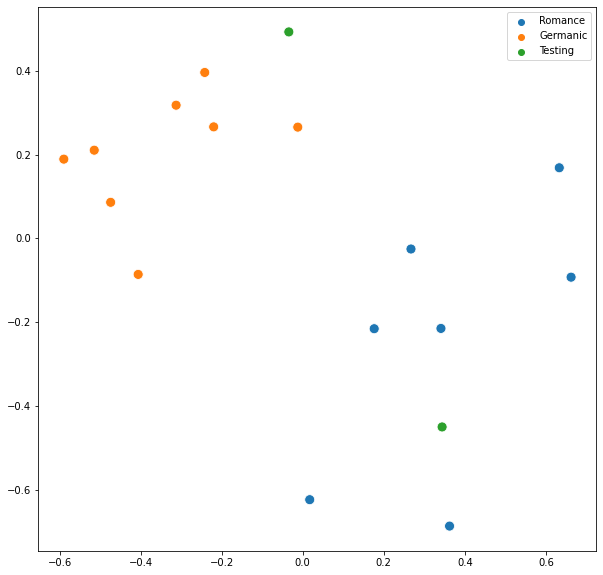

In [16]:
## Let's plot using MDS
mds_model = MDS(n_components=2, random_state=111)
X_mds = mds_model.fit_transform(np.vstack([X_train, X_test]))

y_mds = y_train.replace([0,1], ['Romance', 'Germanic'])
y_mds = np.concatenate([y_mds, ['Testing', 'Testing']])

plt.figure(figsize=(10,10))
sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=y_mds, s=100)